In [96]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [74]:
url = 'https://api.darksky.net/forecast/c75fe89710b37b9fd1531010a8968ef1/37.870100,-122.257859,1543027140'
resp = requests.get(url)

In [75]:
resp.status_code

200

In [76]:
d = resp.json()

In [77]:
hour_lst = d['hourly']['data']

In [78]:
len(hour_lst)

24

In [79]:
df = pd.read_csv('data.csv', index_col='Unnamed: 0')

In [80]:
hourly = df.iloc[::2]

In [81]:
hourly.to_csv('hourly_data.csv')

In [82]:
april = hourly.loc['2010-04-01 00:00:00': '2010-04-30 00:00:00']

In [83]:
hours = april.index
days = april.iloc[::24]

In [56]:
timestamps = [pd.Timestamp(i,  tz='US/Central') for i in days.index]

In [57]:
ts = timestamps[0]

In [58]:
int(ts.value / (1*10**9))

1270098000

In [59]:
def get_epoch(timestamp_str, tz='US/Pacific'):
    ts = pd.Timestamp(timestamp_str,  tz=tz)
    return int(ts.value / (1*10**9))

In [62]:
epochs = [get_epoch(t, tz='US/Central') for t in days.index]
epochs[0:5]

[1270098000, 1270184400, 1270270800, 1270357200, 1270443600]

In [111]:
def get_hourly_weather(lat, lon, timestamp_str, tz='US/Pacific', key='c75fe89710b37b9fd1531010a8968ef1'):
    base_url = 'https://api.darksky.net/forecast/' + key + '/'
    with_location = base_url + str(lat) + ',' + str(lon)
    epoch = get_epoch(timestamp_str, tz)
    with_time = with_location + ',' + str(epoch)
    resp = requests.get(with_time)
    if resp.status_code != 200:
        raise RuntimeError('API call errored with code: ' + resp.status_code)
    data_dict = resp.json()
    daterange = pd.date_range(timestamp_str, periods=24, freq='1H')
    df = pd.DataFrame(data_dict['hourly']['data'])
    df.index = daterange
    df = df.drop(columns=['time'])
    return df

In [112]:
lat = 37.870100
lon = -122.257859
timestamp_str = april.index[0]
tz = 'US/Central'
data = get_hourly_weather(lat, lon, timestamp_str, tz)

In [113]:
data

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipIntensity,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
2010-04-01 00:00:00,45.91,0.70,41.40,0.84,partly-cloudy-night,0.0037,0.28,rain,1013.33,Mostly Cloudy,45.91,0,10.00,221,5.17,2.67
2010-04-01 01:00:00,44.77,0.79,41.66,0.85,partly-cloudy-night,0.0127,0.57,rain,1012.93,Mostly Cloudy,45.92,0,8.36,243,8.15,3.30
2010-04-01 02:00:00,43.10,0.98,41.30,0.87,rain,0.0379,0.73,rain,1012.87,Light Rain,44.85,0,8.77,273,8.15,3.80
2010-04-01 03:00:00,43.07,1.00,41.18,0.89,rain,0.0309,0.76,rain,1012.26,Light Rain,44.29,0,9.79,270,5.22,3.14
2010-04-01 04:00:00,44.09,0.90,40.99,0.89,partly-cloudy-night,0.0141,0.58,rain,1011.53,Mostly Cloudy,44.09,0,9.67,265,4.58,2.76
2010-04-01 05:00:00,42.23,0.77,40.43,0.88,partly-cloudy-night,0.0062,0.40,rain,1011.67,Mostly Cloudy,43.68,0,9.78,277,6.40,3.28
2010-04-01 06:00:00,42.96,0.74,39.77,0.88,partly-cloudy-night,0.0098,0.56,rain,1011.82,Mostly Cloudy,42.96,0,9.66,288,5.87,2.71
2010-04-01 07:00:00,41.66,0.24,38.57,0.89,clear-night,0.0062,0.47,rain,1011.92,Clear,41.66,0,10.00,268,4.46,1.64
2010-04-01 08:00:00,42.65,0.27,39.38,0.88,partly-cloudy-day,0.0003,0.05,rain,1012.46,Partly Cloudy,42.65,0,9.84,269,3.39,1.52
2010-04-01 09:00:00,45.87,0.31,40.89,0.83,partly-cloudy-day,0.0000,0.00,NaN,1013.02,Partly Cloudy,45.87,1,10.00,258,5.00,2.03


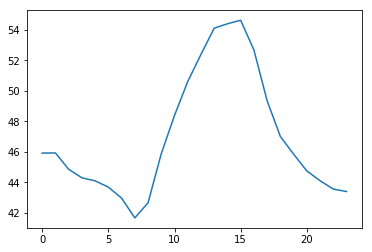

In [98]:
plt.plot(hourly['temperature'])